In [145]:
import numpy as np
import pandas as pd
import seaborn as sns

In [148]:
datasetLocation = "Datasets/processedHouse_Price.csv"
# datasetLocation = 'https://raw.githubusercontent.com/mbharti321/dataBank/main/Udemy/House_Price.csv'
df = pd.read_csv(datasetLocation, header=0)
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [151]:
df.shape

(506, 16)

# Simple linear regression

- `y = B0 + B1*X`

In [154]:
import statsmodels.api as sn

In [157]:
#adding B1 into X variable following the formula `y = B1 + B0*X`
x = sn.add_constant(df.room_num)

In [160]:
y = df.price

In [ ]:
# ols: ordinary least square
lm = sn.OLS(y, x).fit()

In [139]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.31e-74
Time:                        20:14:06   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using `sklearn` library

In [141]:
from sklearn.linear_model import LinearRegression

In [143]:
y = df.price

In [146]:
# x will be two dimentional array, why?
x = df[['room_num']]

In [149]:
# craeting Linear regression object
lm2 = LinearRegression()

In [152]:
# fitting the model with x, y data
lm2.fit(x,y)

LinearRegression()

In [155]:
# printing B0 and B1(i.e. intecept, slope)
print(lm2.intercept_, lm2.coef_)

-34.65924312309724 [9.09966966]


In [158]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

In [161]:
lm2.predict(x)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [164]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

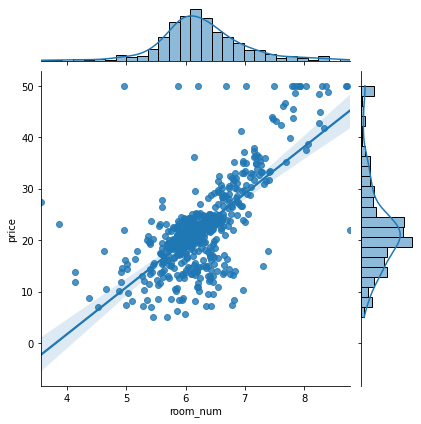

In [165]:
sns.jointplot(x = df.room_num, y= df.price, data = df, kind  ='reg')

# Multi linear regression

- `y = B0 + B1*X1+ B2*X2+ B3*X3+ ..... + Bp*Xp`

In [166]:
x_multi = df.drop('price', axis = 1)

In [167]:
x_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [168]:
y_multi = df['price']

In [169]:
x_multi_const = sn.add_constant(x_multi)

In [170]:
x_multi_const.head()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [171]:
# ordinary least quuare
lm_multi = sn.OLS(y_multi, x_multi_const).fit()

In [172]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     84.34
Date:                Thu, 17 Jun 2021   Prob (F-statistic):          4.19e-125
Time:                        20:14:11   Log-Likelihood:                -1516.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     490   BIC:                             3133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4986      5.264     -1.235      0.218     -16.842       3.844
crime_rate                   0.0097      0.348      0.028      0.978      -0.674       0.694
resid_area                  -0.0409      0.058     -0.710      0.478      -0.154       0.072
air_qual                   -15.8974      4.004     -3.971      0.000     -23.764      -8.031
room_num                     4.0190      0.427      9.421      0.000       3.181       4.857
age                         -0.0057      0.014     -0.420      0.675      -0.032       0.021
teachers                     1.0070      0.122      8.247      0.000       0.767       1.247
poor_prop                   -0.5773      0.053    -10.955      0.000      -0.681      -0.474
n_hos_beds                   0.3292      0.152      2.163      0.031       0.030       0.628
n_hot_rooms                  0.0919      0.082      1.118      0.264      -0.070       0.253
rainfall                     0.0161      0.018      0.904      0.367      -0.019       0.051
avg_dist                    -1.2186      0.189     -6.450      0.000      -1.590      -0.847
airport_YES                  1.1315      0.454      2.491      0.013       0.239       2.024
waterbody_Lake               0.2641      0.642      0.411      0.681      -0.997       1.525
waterbody_Lake and River    -0.6876      0.714     -0.963      0.336      -2.090       0.715
waterbody_River             -0.2913      0.547     -0.533      0.594      -1.365       0.783
==============================================================================
Omnibus:                      182.596   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.137
Skew:                           1.554   Prob(JB):                    4.04e-180
Kurtosis:                       8.434   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpretession

-  **R-squared** value is 0.721, which is pretty good
-  **Prob(F-statistic)** value is very low( e^-125), which leads us to say confidently that our independent variables have some impact on our dependent variable.
-  Degree of freedom: 490; `num. of row - total variables - 1`
- `P>|t|`, the lower the **p-value** (less than 0.05), the more significant the variable for predicting y.

  - Here, variables having lower p-value,

        - air_qual

        - room_num

        - teachers

        - poor_prop

        - avg_dist

        - airport_yes, these are the most significant variables in our model
-  
-  Check the sign of coef of each variable,

        - +ve: (num_num, teachers,airpot_yes) positive impact
        - -ve: (air_qual) negative impact
-  

### MultiRegression using `sklearn` library

In [173]:
# craeting Linear regression object
lm_multi2 = LinearRegression()

In [174]:
lm_multi2.fit(x_multi, y_multi)

LinearRegression()

In [175]:
lm_multi2.intercept_

-6.498625198419646

In [176]:
lm_multi2.coef_ 

array([ 9.70998193e-03, -4.08746495e-02, -1.58973999e+01,  4.01901676e+00,
       -5.71475069e-03,  1.00700068e+00, -5.77271243e-01,  3.29221139e-01,
        9.18675603e-02,  1.61185504e-02, -1.21863952e+00,  1.13151586e+00,
        2.64086064e-01, -6.87555889e-01, -2.91318712e-01])

# `Train-Test` split of dataset

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.2, random_state = 0)
# test_size = 0.2, denotes that we want test dataset is of 20% of our whole data
# random_state = 0, denotes how randomly we want to select observations for test and train 

In [179]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 15) (102, 15) (404,) (102,)


### Training our linear model on `training data`

In [180]:
lm_a = LinearRegression()

In [181]:
lm_a.fit(x_train, y_train)

LinearRegression()

In [182]:
print(lm_a.intercept_, lm_a.coef_)

-8.599099980767086 [-3.84156322e-01 -5.25277481e-02 -1.48949023e+01  4.04498613e+00
 -8.91670611e-03  1.11153283e+00 -5.31323850e-01  2.07431226e-01
  7.86124713e-02  3.25142378e-02 -1.17123707e+00  7.27541334e-01
  2.37276220e-01 -4.68380802e-01 -5.79557398e-02]


**Predicting data using trained model**

In [183]:
y_test_a = lm_a.predict(x_test)

In [184]:
y_train_a = lm_a.predict(x_train)

In [185]:
# Getting R-squared value
from sklearn.metrics import r2_score

In [186]:
# r2_score? #->getting help

# on test dataset
r2_score(y_test, y_test_a)

0.5496468288205671

In [187]:
# on train dataset
r2_score(y_train, y_train_a)

0.756463540591123

### `Interpretation`
> `R2 of 1` indicates that the regression predictions `perfectly fit` the data.

- `Train dataset` has less variability i.e. the prediction is `better` on train dataset
- `Test dataset` has higher variability i.e. the prediction is `very less accurate` 
  

---

# `Ridge` and `Lasso` regression 

In [188]:
from sklearn import preprocessing

In [189]:
# standarizing the data
scaler = preprocessing.StandardScaler().fit(x_train)

In [190]:
x_train_s = scaler.transform(x_train)

In [191]:
x_test_s = scaler.transform(x_test)

In [128]:
from sklearn.linear_model import Ridge

In [201]:
lm_r = Ridge(alpha=0.5)
# alpha is lembda `人`.

In [202]:
lm_r.fit(x_train_s, y_train)

Ridge(alpha=1e-06)

In [203]:
r2_score(y_test, lm_r.predict(x_test_s))

0.5496468283906919

We can change alpha value to get R2 max

In [204]:
from sklearn.model_selection import validation_curve

In [216]:
# validation_curve?
# Signature:
# validation_curve(
#     estimator,
#     X,
#     y,
#     *,
#     param_name,
#     param_range,
#     groups=None,
#     cv=None,
#     scoring=None,
#     n_jobs=None,
#     pre_dispatch='all',
#     verbose=0,
#     error_score=nan,
# )

In [213]:
param_range = np.logspace(-2,8, 100)
# create 100 values between 10^-2 to 10^8

In [214]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [220]:
train_scores, test_scores = validation_curve(Ridge(), x_train_s, y_train, 'alpha', param_range, scoring = 'r2')

C:\Users\mbhar\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.722

In [221]:
print(train_scores)
print(test_scores)

[[7.49308183e-01 7.62593562e-01 7.52614692e-01 7.82225880e-01
  7.45875174e-01]
 [7.49308182e-01 7.62593561e-01 7.52614692e-01 7.82225879e-01
  7.45875174e-01]
 [7.49308181e-01 7.62593560e-01 7.52614691e-01 7.82225879e-01
  7.45875173e-01]
 [7.49308179e-01 7.62593559e-01 7.52614690e-01 7.82225878e-01
  7.45875172e-01]
 [7.49308177e-01 7.62593557e-01 7.52614688e-01 7.82225876e-01
  7.45875169e-01]
 [7.49308173e-01 7.62593554e-01 7.52614685e-01 7.82225873e-01
  7.45875166e-01]
 [7.49308167e-01 7.62593549e-01 7.52614680e-01 7.82225869e-01
  7.45875161e-01]
 [7.49308157e-01 7.62593541e-01 7.52614673e-01 7.82225863e-01
  7.45875153e-01]
 [7.49308142e-01 7.62593528e-01 7.52614661e-01 7.82225852e-01
  7.45875140e-01]
 [7.49308117e-01 7.62593507e-01 7.52614642e-01 7.82225836e-01
  7.45875120e-01]
 [7.49308077e-01 7.62593474e-01 7.52614611e-01 7.82225810e-01
  7.45875087e-01]
 [7.49308015e-01 7.62593422e-01 7.52614563e-01 7.82225768e-01
  7.45875035e-01]
 [7.49307915e-01 7.62593340e-01 7.526144

In [222]:
train_mean = np.mean(train_scores,axis = 1)

In [223]:
test_mean = np.mean(test_scores,axis = 1)

In [224]:
train_mean

array([7.58523498e-01, 7.58523498e-01, 7.58523497e-01, 7.58523495e-01,
       7.58523493e-01, 7.58523490e-01, 7.58523485e-01, 7.58523477e-01,
       7.58523465e-01, 7.58523444e-01, 7.58523412e-01, 7.58523361e-01,
       7.58523279e-01, 7.58523149e-01, 7.58522943e-01, 7.58522616e-01,
       7.58522096e-01, 7.58521272e-01, 7.58519967e-01, 7.58517903e-01,
       7.58514642e-01, 7.58509504e-01, 7.58501426e-01, 7.58488767e-01,
       7.58469009e-01, 7.58438313e-01, 7.58390900e-01, 7.58318167e-01,
       7.58207499e-01, 7.58040697e-01, 7.57791990e-01, 7.57425604e-01,
       7.56892859e-01, 7.56128767e-01, 7.55047956e-01, 7.53539650e-01,
       7.51461316e-01, 7.48630795e-01, 7.44817400e-01, 7.39733711e-01,
       7.33031346e-01, 7.24305121e-01, 7.13109816e-01, 6.98991272e-01,
       6.81529042e-01, 6.60382794e-01, 6.35332488e-01, 6.06305522e-01,
       5.73391865e-01, 5.36855113e-01, 4.97146810e-01, 4.54921329e-01,
       4.11035982e-01, 3.66516907e-01, 3.22481685e-01, 2.80029437e-01,
      

In [225]:
max(test_mean)

0.7386139417704551

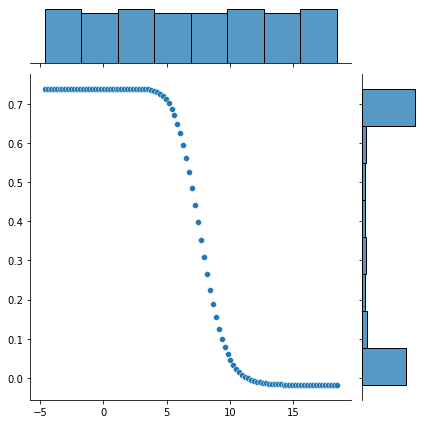

In [226]:
sns.jointplot(x = np.log(param_range), y = test_mean)

In [228]:
np.where(test_mean==max(test_mean))

(array([31], dtype=int64),)

In [232]:
param_range[31]

13.530477745798061

In [233]:
lm_r_best = Ridge(alpha = param_range[31])

In [234]:
lm_r_best.fit(x_train_s,y_train)

Ridge(alpha=13.530477745798061)

In [236]:
r2_score(y_test, lm_r_best.predict(x_test_s))

0.5439016594512955

In [237]:
r2_score(y_train, lm_r_best.predict(x_train_s))

0.7557313242810378

### Lasso regression

In [239]:
from sklearn.linear_model import Lasso

In [241]:
lm_l = Lasso(alpha = 0.4)

In [242]:
lm_l.fit(x_train_s, y_train)

Lasso(alpha=0.4)

In [243]:
r2_score(y_test, lm_l.predict(x_test_s))

0.5150841547786357